Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = ""
ID = ""

---

## Homework 1: Implementing Iterative reweighted Least Square ... 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/GabbySuwichaya/Statistical-Learning-EE575/blob/master/Homework1/main.ipynb)

The topics covered in this exercise are: 

- [Data Visualization and Preprocessing](#data-visualization--preprocessing)
- [Ordinary Least Square](#ordinary-least-square)
- [Weighted Least Square](#weighted-least-square)
- [Iterative Re-weighted Least Square**](#iterative-reweighted-least-square)
- [Performance Comparison](#compair-all-the-methods)   
    - [Numerical Result](#numerical-results) 
    - [Visual Result](#visual-results) 

** Denotes the parts that you have to fill up with correct Python commands...  

In [2]:
# ! pip install numpy pandas tqdm matplotlib statsmodels
# ! pip install -q kaggle

Download data from Kreggle website:

In [3]:
! kaggle datasets download -d nehalbirla/vehicle-dataset-from-cardekho

vehicle-dataset-from-cardekho.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile

foldername = "vehicle-dataset"

with zipfile.ZipFile("vehicle-dataset-from-cardekho.zip","r") as zip_ref:
    zip_ref.extractall(foldername)

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn import metrics 

## Data Visualization & Preprocessing

Dataframe contains 9 attributes: Car_name, Year, Selling_Price, Present_Price, Kms_Driven, Fuel_Type, Seller_Type, Transmission, Owner

In [6]:
df = pd.read_csv('%s/car data.csv' % foldername) 

Encode target labels with value between 0 and n_classes-1.

In [7]:
# print("Raw value before Encoding ...")
#print(np.unique(df['Car_Name'].values))
#print(np.unique(df['Transmission'].values))
#print(np.unique(df['Fuel_Type'].values))
#print(np.unique(df['Seller_Type'].values))

df[['Car_Name', 'Fuel_Type','Seller_Type','Transmission']] = df.loc[:,['Car_Name', 'Fuel_Type','Seller_Type','Transmission']].apply(LabelEncoder().fit_transform)
# print("After Encoding: ")
# print(np.unique(df['Car_Name'].values))
# print(np.unique(df['Transmission'].values))
# print(np.unique(df['Fuel_Type'].values))
# print(np.unique(df['Seller_Type'].values))

### Separate training and testing for Signle Feature

In [8]:
from sklearn.model_selection import train_test_split

# Define features and target variable
Feat_List = ['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type','Seller_Type','Transmission', 'Owner']
X = df.loc[:, Feat_List].values
y = df['Selling_Price'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

In [9]:
Xscaler = StandardScaler()
X_train        = Xscaler.fit_transform(X_train)
X_test         = Xscaler.transform(X_test)

Yscaler = StandardScaler()
y_train        = Yscaler.fit_transform(y_train) 

dim = X_train.shape[1] # dim:= Feature Dimension
m = X_train.shape[0]   # m:= Number of Measurements(Training)
n = X_test.shape[0]    # n:= Number of Measurements(Testing)

print("Feature Dimension dim:= %d" % dim)
print("Number Measurements (Training) m:= %d" % m)
print("Number Measurements (Testing)  n:= %d" % n)

Feature Dimension dim:= 8
Number Measurements (Training) m:= 240
Number Measurements (Testing)  n:= 61


#### Define a function call `Collect` to collect the qualitative evaluation.

In [10]:
Test_Eval = {}

def Collect(Test_Eval, Keyname, y_test, y_pred):
    Test_Eval[Keyname] =  { "MAE": metrics.mean_absolute_error(y_test,y_pred), 
                            "MSE": metrics.mean_squared_error(y_test,y_pred),
                            "RMSE" : np.sqrt(metrics.mean_squared_error(y_test,y_pred)),
                            "R2score": metrics.r2_score(y_test,y_pred)}  
    return Test_Eval

## Ordinary Least Square

In [11]:
def OLS(X_train, y_train): 
    invXTX =  np.linalg.pinv(X_train.T @ X_train )
    beta   = invXTX @  X_train.T @  y_train
    return beta

beta_OLS = OLS(X_train, y_train)
y_pred_OLS  =  X_test @  beta_OLS 

y_pred_OLS = Yscaler.inverse_transform(y_pred_OLS) 

In [12]:
print("================== OLS =========================") 
print("MAE:",metrics.mean_absolute_error(y_test,y_pred_OLS))
print("MSE:",metrics.mean_squared_error(y_test,y_pred_OLS))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred_OLS)))
print("R2score:",metrics.r2_score(y_test,y_pred_OLS))

================== OLS =========================
MAE: 0.9992677375917779
MSE: 2.1868189190905096
RMSE: 1.4787896804787724
R2score: 0.9134869106859319


In [13]:
keyname = "OLS"
Test_Eval = Collect(Test_Eval, keyname, y_test,y_pred_OLS)

## Weighted Least Square

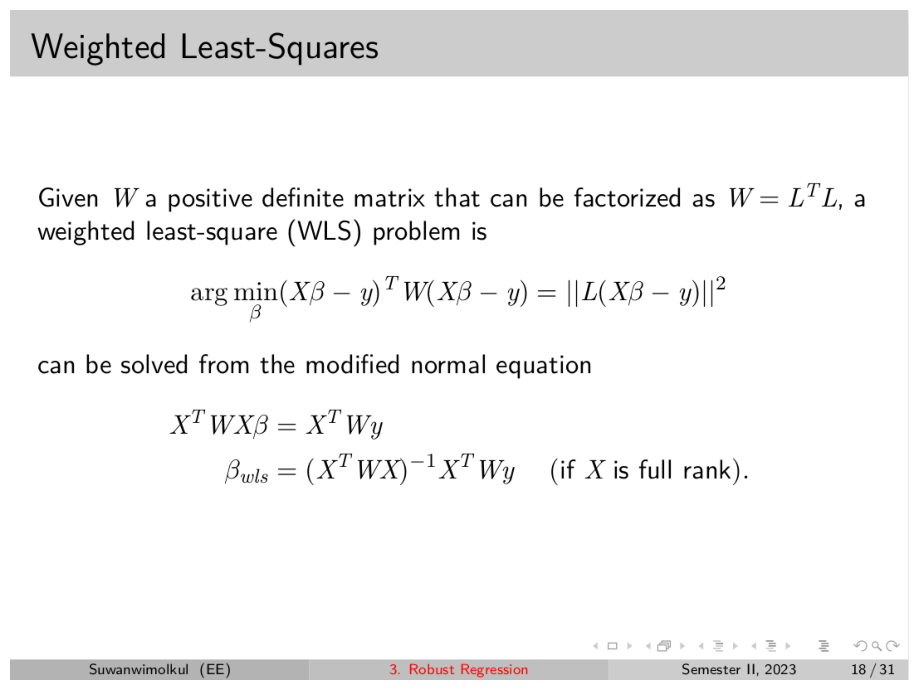

In [14]:
plt.figure(figsize=(21,7)); Image=plt.imread("figures/WLS.png"); plt.axis("off"); plt.imshow(Image); plt.tight_layout()

In [ ]:
def WLS(X_train, y_train, W):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
W =  np.arange(1, m+1)
b_WLS = WLS(X_train, y_train, W)
y_pred_WLS = X_test @ b_WLS 

y_pred_WLS = Yscaler.inverse_transform(y_pred_WLS)

In [ ]:
print("================== WLS =========================") 
print("MAE:",metrics.mean_absolute_error(y_test,y_pred_WLS))
print("MSE:",metrics.mean_squared_error(y_test,y_pred_WLS))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred_WLS)))
print("R2score:",metrics.r2_score(y_test,y_pred_WLS)) 
print("-----------------------------------------------") 
print("MSE: ||y_pred_OLS - y_pred_WLS||^2 =", metrics.mean_squared_error(y_pred_OLS,y_pred_WLS))

In [ ]:
keyname = "WLS"
Test_Eval = Collect(Test_Eval, keyname, y_test, y_pred_WLS)

## Iterative reweighted Least Square

In [ ]:
plt.figure(figsize=(21,7)); Image=plt.imread("figures/IRLS.png"); plt.axis("off"); plt.imshow(Image); plt.tight_layout()

In [ ]:
def weight_function(u, w_func='bisquare'):
    if w_func == 'bisquare':
        weight  = ( np.abs(u) <= 1 )*(1 - u**2)**2 
    
    elif w_func == 'cauchy':
        weight     = 1/(1 + u**2)

    elif w_func == 'huber':
        weight     = 1/( 1*(1 >=np.abs(u)) + np.abs(u)*(1 <np.abs(u)) )

    elif w_func == 'logistic':
        weight     = np.tanh(u)/u

    else: # 'fair'
        weight     = 1 / (1 + np.abs(u))

    return weight


In [ ]:
def IRLS(X_train, y_train, W_init, w_func='bisquare', max_round=10, k=1.0):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
W_init = np.ones((m,m))
W_init = np.diag(W_init)
b_IRLS, error = IRLS(X_train, y_train, W_init, w_func='bisquare', max_round=10, k=1.0)

In [ ]:
y_pred_IRLS = X_test @ b_IRLS
y_pred_IRLS = Yscaler.inverse_transform(y_pred_IRLS)

print("================== IRLS =========================")  
print("MAE [IRLS]:",metrics.mean_absolute_error(y_test,y_pred_IRLS))
print("MSE [IRLS]:",metrics.mean_squared_error(y_test,y_pred_IRLS))
print("RMSE [IRLS]:",np.sqrt(metrics.mean_squared_error(y_test,y_pred_IRLS)))
print("R2score [IRLS]:", metrics.r2_score(y_test,y_pred_IRLS)) 
print("-----------------------------------------------") 
print("MSE: ||y_OLS - y_IRLS_manual||^2 =", metrics.mean_squared_error(y_pred_OLS,y_pred_IRLS))


In [ ]:
keyname = "IRLS"
Test_Eval = Collect(Test_Eval, keyname, y_test, y_pred_IRLS)

#### You need to pass the following test:

In [ ]:
assert metrics.mean_absolute_error(y_test,y_pred_IRLS)         <  metrics.mean_absolute_error(y_test,y_pred_OLS) 
assert metrics.mean_squared_error(y_test,y_pred_IRLS)          <  metrics.mean_squared_error(y_test,y_pred_OLS) 
assert np.sqrt(metrics.mean_squared_error(y_test,y_pred_IRLS)) <  np.sqrt(metrics.mean_squared_error(y_test,y_pred_OLS))
assert metrics.r2_score(y_test,y_pred_IRLS)                    >=  metrics.r2_score(y_test,y_pred_OLS)

## Compair all the methods

### Numerical Results

In [ ]:
print( "      %s, %s, %s "           % (list(Test_Eval.keys())[0], list(Test_Eval.keys())[1], list(Test_Eval.keys())[2]))
print( "    MAE: %.2f, %.2f, %.2f "  % (Test_Eval["OLS"]["MAE"], Test_Eval["WLS"]["MAE"], Test_Eval["IRLS"]["MAE"]))
print( "    MSE: %.2f, %.2f, %.2f "  % (Test_Eval["OLS"]["MSE"], Test_Eval["WLS"]["MSE"], Test_Eval["IRLS"]["MSE"]))
print( "   RMSE: %.2f, %.2f, %.2f "  % (Test_Eval["OLS"]["RMSE"], Test_Eval["WLS"]["RMSE"], Test_Eval["IRLS"]["RMSE"]))
print( "R2score: %.2f, %.2f, %.2f "  % (Test_Eval["OLS"]["R2score"], Test_Eval["WLS"]["R2score"], Test_Eval["IRLS"]["R2score"])) 

### Visual Results

You need to be able to provide the reasonable plots for the two following plots.
   - scatter_OLS_WLS_IRLS_1.png
   - scatter_OLS_WLS_IRLS_2.png

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:,2], y_test, alpha=0.5, label='Measured', c='blue')
plt.scatter(X_test[:,2], y_pred_OLS, alpha=0.5, label='OLS', c='red')
plt.scatter(X_test[:,2], y_pred_WLS, alpha=0.5, label='WLS', c='orange')
plt.scatter(X_test[:,2], y_pred_IRLS, alpha=0.5, label='IRLS', c='lime')
plt.xlabel("Present Price $X$")
plt.ylabel("Selling Price $Y$")
plt.title("Scatter Plot of Present_Price vs. Selling Price (Measured vs. Predicted)")
plt.legend()
plt.grid(True)
plt.savefig("scatter_OLS_WLS_IRLS_1.png")
plt.show()

In [ ]:
def draw_line(X, b_weight):
    "Add a line with slope m and intercept b to ax"
    xlim =[X.min(), X.max()]
    ylim = [b_weight[2]* xlim[0] + b_weight[0], b_weight[2] * xlim[1] + b_weight[0]] 
    return xlim, ylim

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(X_test[:,2], y_test, alpha=0.5, label='Measured', c='blue')  
plt.scatter(X_test[:,2], y_pred_OLS, alpha=0.5, label='OLS', c='red')
xlim_true, ylim_OLS = draw_line(X_test[:,2], beta_OLS)
ylim_OLS = Yscaler.inverse_transform(ylim_OLS)

plt.plot(xlim_true, ylim_OLS, "red")
plt.scatter(X_test[:,2], y_pred_WLS, alpha=0.5, label='WLS', c='orange')
xlim_true, ylim_WLS = draw_line(X_test[:,2], b_WLS)
ylim_WLS = Yscaler.inverse_transform(ylim_WLS)

plt.plot(xlim_true, ylim_WLS, "orange")
plt.scatter(X_test[:,2], y_pred_IRLS, alpha=0.5, label='IRLS', c='lime')
xlim_true, ylim_IRLS = draw_line(X_test[:,2], b_IRLS)
ylim_IRLS = Yscaler.inverse_transform(ylim_IRLS)

plt.plot(xlim_true, ylim_IRLS, "green")
plt.xlabel("Present Price $X$")
plt.ylabel("Selling Price $Y$")
plt.title("Scatter Plot of Present_Price vs. Selling Price (Measured vs. Predicted)")
plt.legend()
plt.grid(True)
plt.savefig("scatter_OLS_WLS_IRLS_2.png")
plt.show()